<h1 style="color:rgb(255, 98, 0);">1. Runnable Sequence</h1>

In [14]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableSequence

model = OllamaLLM(model="llama3.2", temperature=2)

prompt1 = PromptTemplate(
    template='Write a joke about: {topic}',
    input_variables=['topic']
)

parser = StrOutputParser()

prompt2 = PromptTemplate(
    template='Explain the following joke: {text}',
    input_variables=['text']
)

chain = RunnableSequence(prompt1, model, parser, prompt2, model, parser)

print(chain.invoke({"topic": "MS Dhoni"}))

This joke is a play on words. The phrase "take it to a new level" has a double meaning here:

1. In cricket, a player's "level" refers to their skill and performance, especially in terms of scoring runs.
2. Literally, taking something (in this case, Dhoni's batting game) to a "new level" means physically climbing up or upward.

The punchline "to a new level" is used both figuratively and literally, creating a pun that connects the cricket term with the common phrase meaning of upgrading or improving something. The joke relies on the wordplay between these two meanings, making it amusing for those who catch the connection!


<h1 style="color:rgb(255, 98, 0);">2. Runnable Parallel</h1>

In [5]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableSequence, RunnableParallel

model = OllamaLLM(model="llama3.2", temperature=2)

prompt1 = PromptTemplate(
    template='Generate a brief tweet about: {topic}',
    input_variables=['topic']
)

prompt2 = PromptTemplate(
    template='Generate a brief Linkedin Post about: {topic}',
    input_variables=['topic']
)

parser = StrOutputParser()

parallel_chain = RunnableParallel({
    'tweet': RunnableSequence(prompt1, model, parser),
    'linkedin_post': RunnableSequence(prompt2, model, parser)
})

result = parallel_chain.invoke({"topic": "AI"})

print(result['tweet'] + "\n")
print(result['linkedin_post'])

"AI is no longer just a trend, it's transforming industries and revolutionizing the way we live & work! From healthcare to education, the potential of artificial intelligence is vast and exciting. What will you be building with AI tomorrow? #ArtificialIntelligence #FutureOfWork"

Here's a brief LinkedIn post about AI:

"Unlocking Human Potential with Artificial Intelligence

As we continue to navigate the rapidly evolving landscape of technology, one trend stands out - the growing integration of artificial intelligence (AI) into our daily lives.

From chatbots that streamline customer service to predictive analytics that inform business decisions, AI is no longer just a buzzword, but a driving force behind innovation and progress.

What role do you think AI will play in your industry? How can we harness its potential to drive growth and create value?

Share your thoughts in the comments! #AI #ArtificialIntelligence #Innovation"

Feel free to modify it according to your needs!


<h1 style="color:rgb(255, 98, 0);">3. Runnable Passthrough</h1>

Jo isko Input me milta hai ye as it is usko Output me send kr deta hai.

In [7]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableSequence, RunnableParallel, RunnablePassthrough

model = OllamaLLM(model="llama3.2", temperature=2)

prompt1 = PromptTemplate(
    template='Write a joke about: {topic}',
    input_variables=['topic']
)

prompt2 = PromptTemplate(
    template='Explain the following joke: {text}',
    input_variables=['text']
)

parser = StrOutputParser()

joke_gen_chain = RunnableSequence(prompt1, model, parser)

parallel_chain = RunnableParallel({
    'joke': RunnablePassthrough(),
    'Explaination': RunnableSequence(prompt2, model, parser)
})

final_chain = RunnableSequence(joke_gen_chain, parallel_chain)

final_chain.invoke({"topic": "AI"})

{'joke': 'Why did the AI program go to therapy?\n\nBecause it was struggling to process its emotions.',
 'Explaination': 'The joke is a play on words, referencing both the technical concept of processing and analyzing information (i.e., "processing" data), as well as emotional processing.\n\nIn this context, the punchline suggests that the AI program goes to therapy because it has difficulty dealing with or understanding human emotions. The phrase "struggling to process its emotions" is a double entendre, implying that both the technical capabilities of the AI (processing data) and the emotional challenges of the program (struggling to understand and cope with feelings) are relevant.\n\nThis joke requires some basic knowledge of AI terminology and its limitations when it comes to dealing with complex human emotions. It\'s a lighthearted and humorous way to highlight the gap between human emotions and artificial intelligence, often used as an example in tech-related comedy or science-th

<h1 style="color:rgb(255, 98, 0);">4. Runnable Lembda</h1>

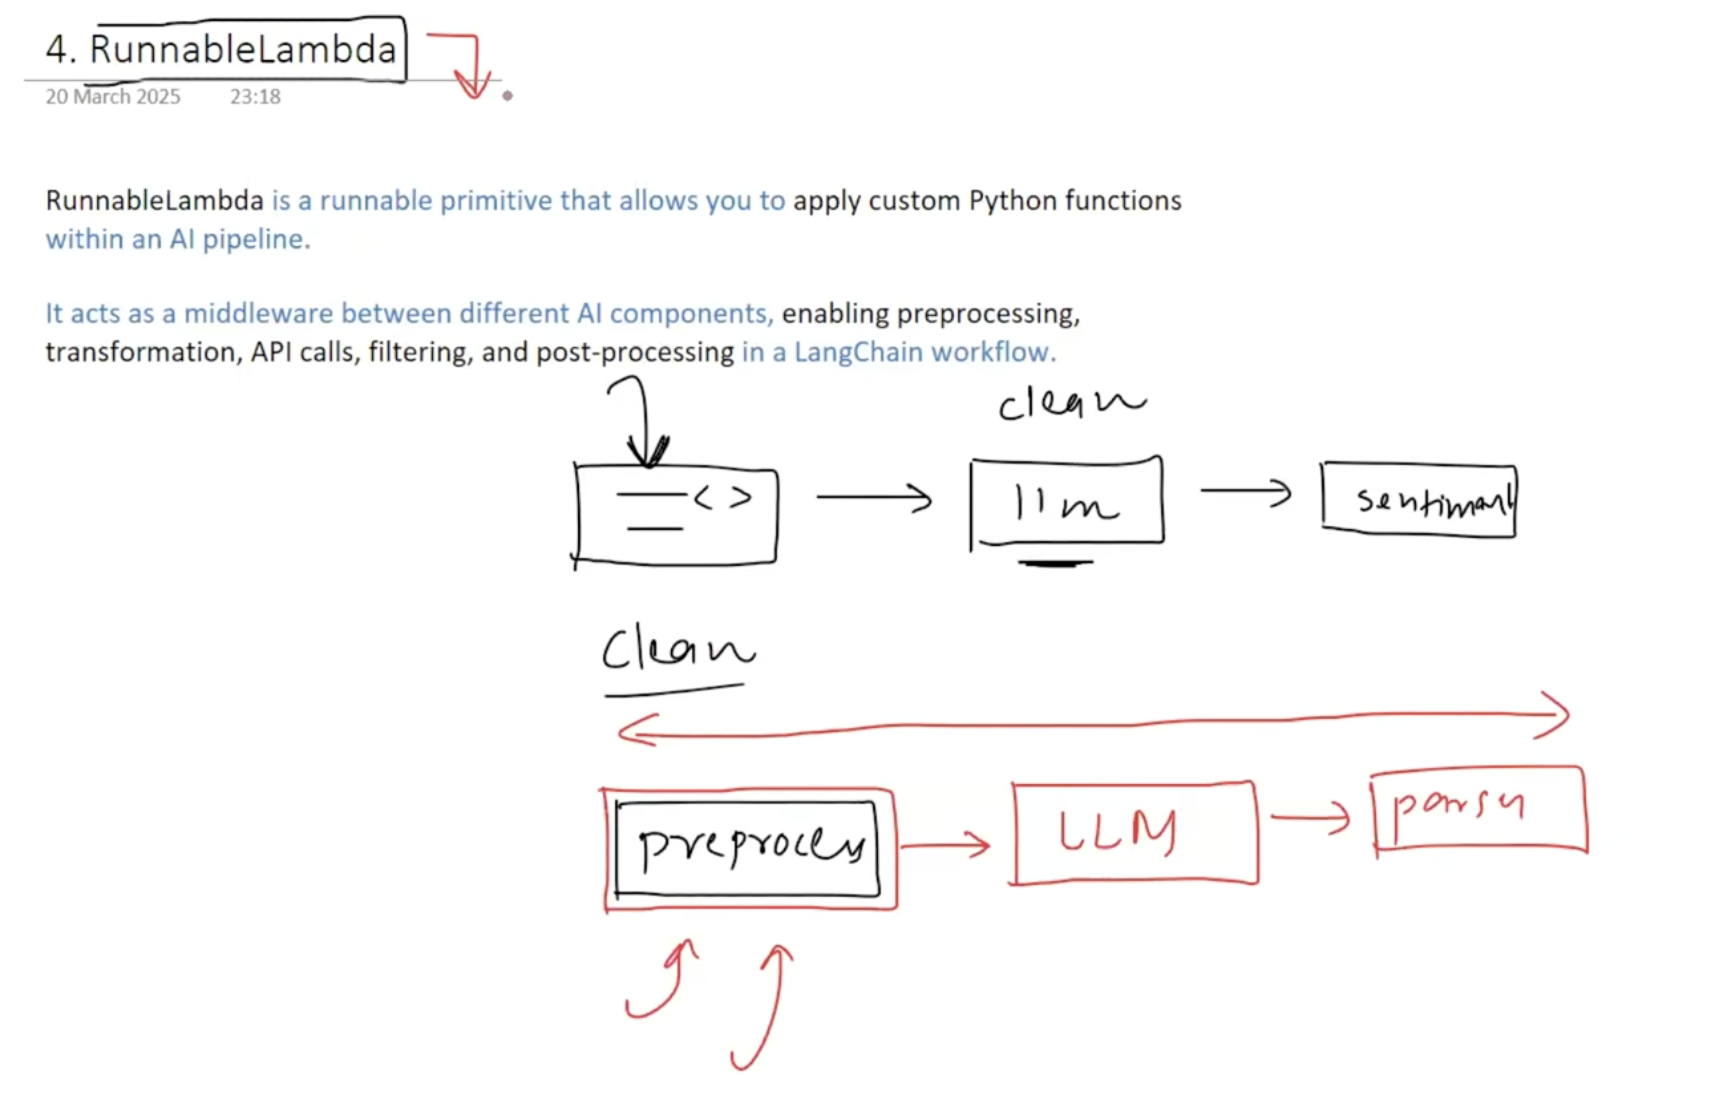

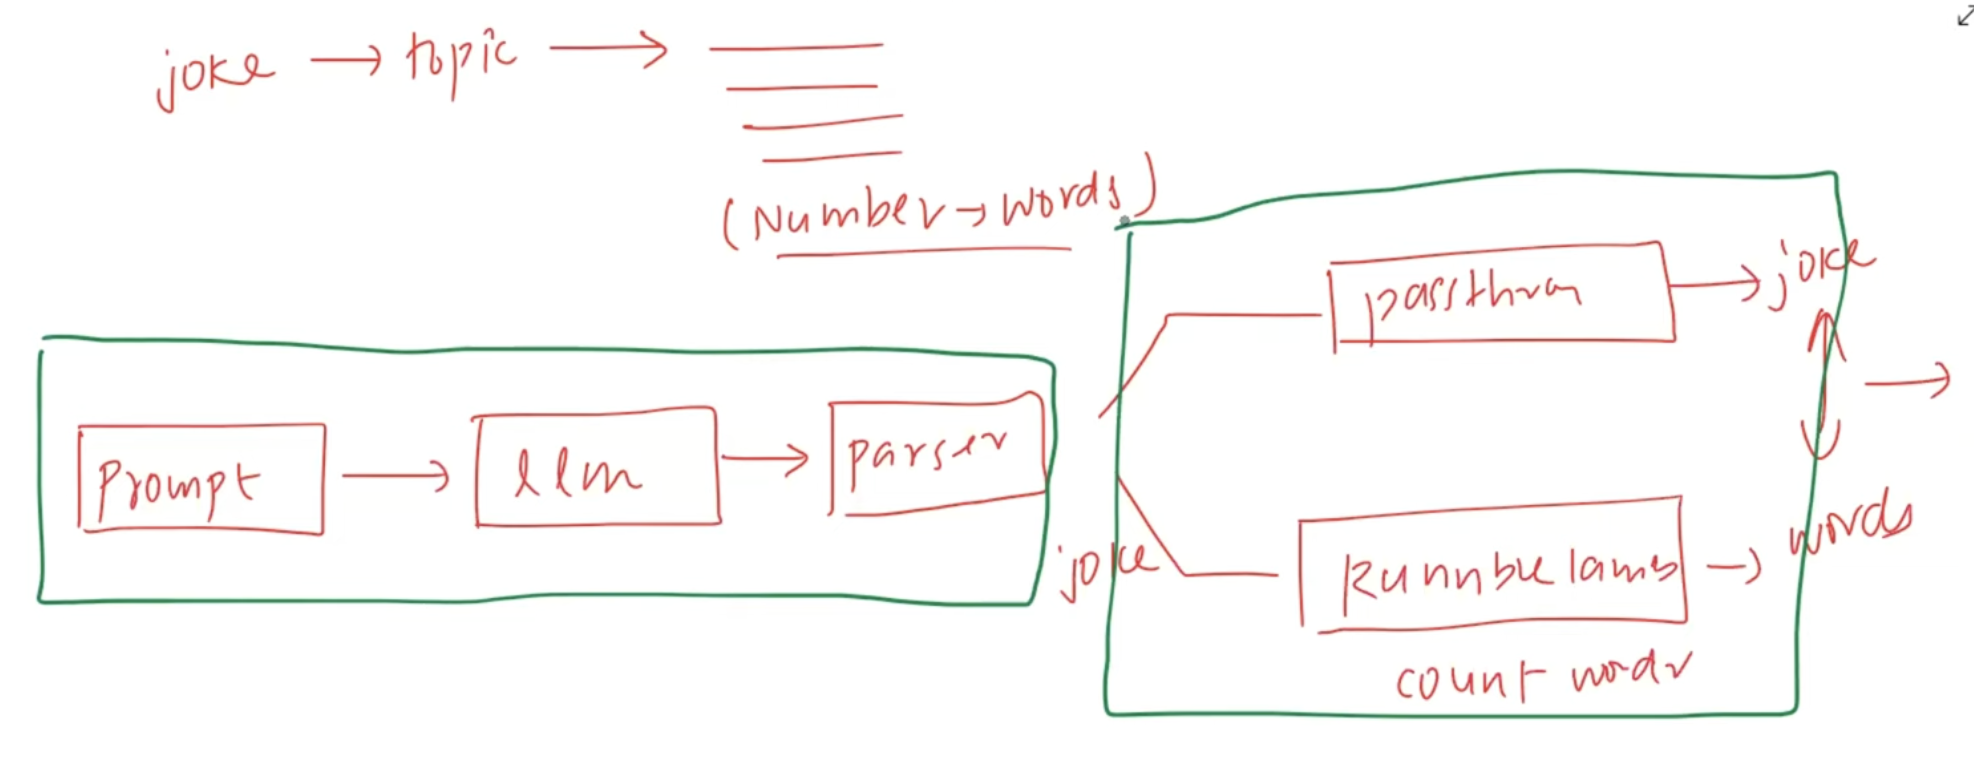

In [11]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableSequence, RunnableParallel, RunnablePassthrough, RunnableLambda

model = OllamaLLM(model="llama3.2", temperature=2)

def word_count(text):
    return len(text.split())

prompt = PromptTemplate(
    template='Write a joke about: {topic}',
    input_variables=['topic']
)

parser = StrOutputParser()

joke_gen_chain = RunnableSequence(prompt, model, parser)

parallel_chain = RunnableParallel({
    'joke': RunnablePassthrough(),
    'word_count': RunnableLambda(word_count)
})

final_chain = RunnableSequence(joke_gen_chain, parallel_chain)

print(final_chain.invoke({"topic": "AI"}))

{'joke': 'Why did the AI program go to therapy?\n\nBecause it was struggling to process its emotions.', 'word_count': 16}


<h1 style="color:rgb(255, 98, 0);">5. Runnable Branch</h1>

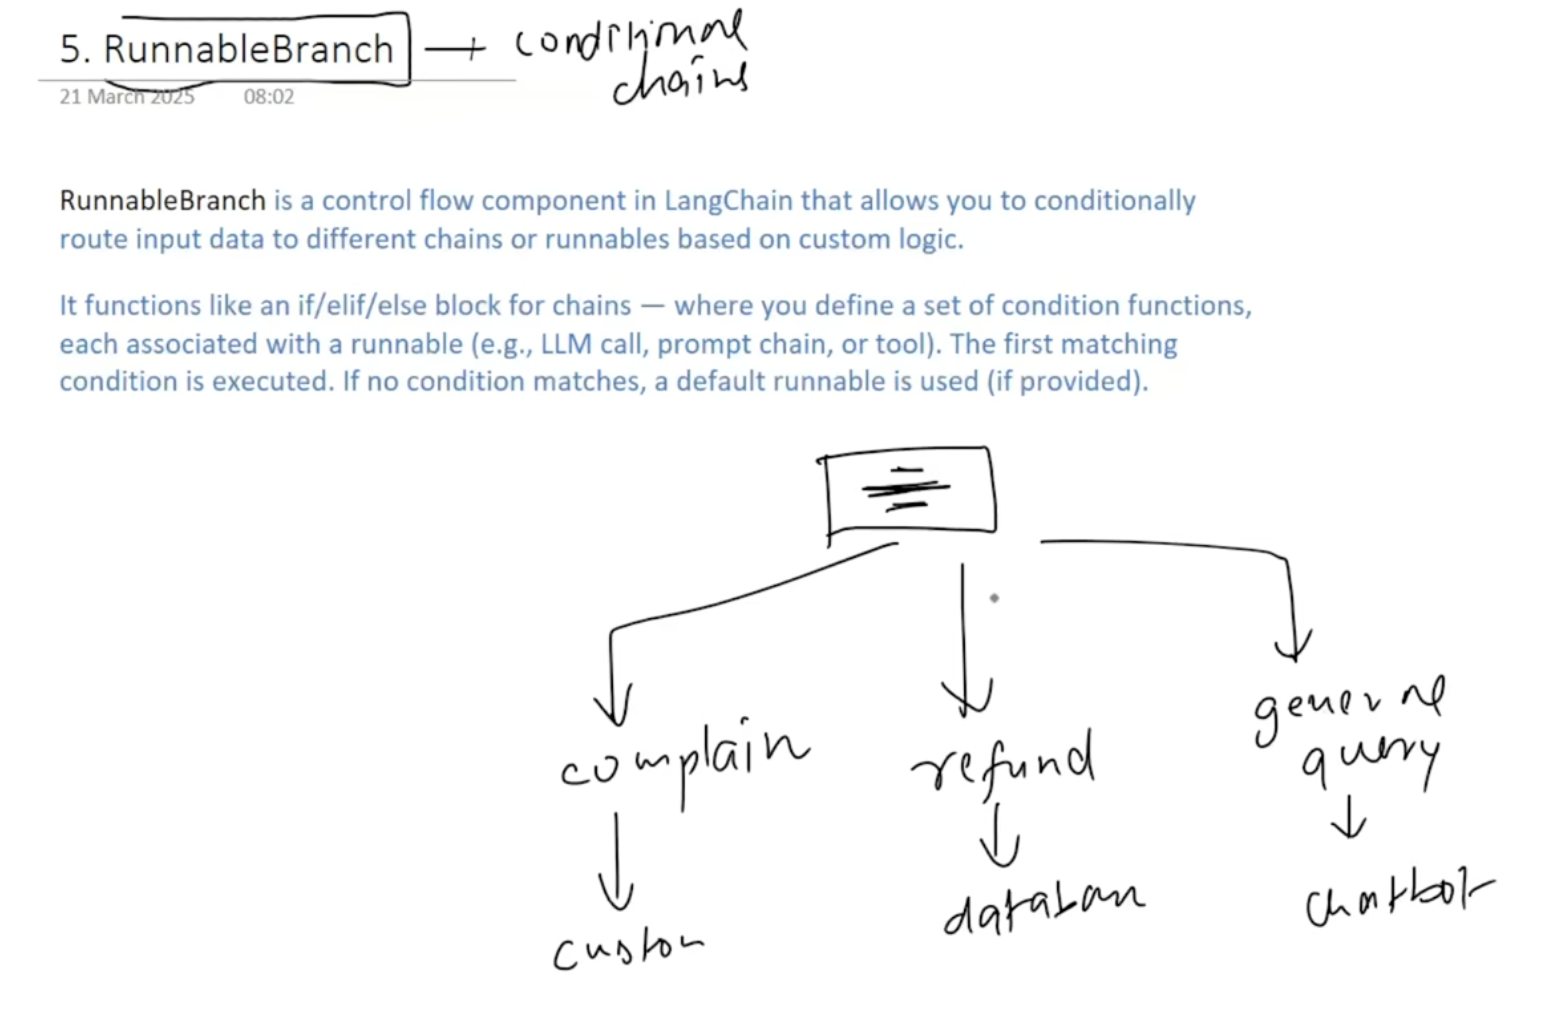

In [ ]:
from langchain_ollama import OllamaLLM
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableSequence, RunnableParallel, RunnablePassthrough, RunnableLambda, RunnableBranch

model = OllamaLLM(model="llama3.2", temperature=2)

def word_count(text):
    return len(text.split())

prompt1 = PromptTemplate(
    template='Write a detailed report on {topic}',
    input_variables=['topic']
)

prompt2 = PromptTemplate(
    template='Summarize the following text \n {text}',
    input_variables=['text']
)

parser = StrOutputParser()

report_gen_chain = RunnableSequence(prompt1, model, parser)

# report_gen_chain = prompt1 | model | parser ---> This syntax can also be used for runnable sequences

branch_chain = RunnableBranch(
    (lambda x: len(x.split())>300, prompt2 | model | parser),
    RunnablePassthrough()
)

# branch_chain = RunnableBranch(
#     (contidion, runnable),
#     (condition, runnable),
#     default
# )

final_chain = RunnableSequence(report_gen_chain, branch_chain)
print(final_chain.invoke({"topic": "AI"}))

The report provides an overview of Artificial Intelligence (AI), its history, current state, applications, challenges, and future prospects. Here's a summary:

**History of AI:**

* The concept of AI dates back to the 1950s.
* Key milestones include machine learning, deep learning, and reinforcement learning.
* Recent advancements have enabled machines to simulate human thought processes.

**Types of AI:**

* Narrow or Weak AI: Designed for specific tasks (e.g., facial recognition).
* General or Strong AI: Theoretical concept that aims to create machines capable of performing any intellectual task required by humans.
* Superintelligence: Hypothetical AI that surpasses human intelligence in all domains.

**Applications of AI:**

* Virtual Assistants
* Image and Speech Recognition
* Healthcare (medical diagnosis, disease prediction)
* Finance (portfolio management, automated trading)
* Customer Service (chatbots, email automation)

**Benefits of AI:**

* Improved Efficiency
* Enhanced Ac